# TP : Analyse du Diabète avec les Arbres de Décision

## Contexte  
Le diabète est une maladie chronique qui affecte la capacité du corps à réguler le taux de sucre dans le sang. Le **Pima Indian Diabetes dataset** fournit des données médicales permettant d’analyser les facteurs influençant le développement du diabète chez les femmes amérindiennes Pima.


## Objectifs  
- Appliquer un **arbre de décision** pour prédire la présence de diabète en fonction des caractéristiques médicales.  
- Comprendre le **fonctionnement** et l’**interprétation** des arbres de décision.  
- Évaluer la **performance** du modèle à l’aide de métriques adaptées. 

## Jeu de Données : Pima Indian Diabetes

Le **Pima Indian Diabetes dataset** est un jeu de données médical utilisé pour la classification du diabète. Il contient des informations sur **768 femmes amérindiennes Pima** âgées de plus de 21 ans. Chaque observation inclut **8 caractéristiques médicales** comme la glycémie, l'IMC et l'âge, ainsi qu'une variable cible indiquant la présence ou l'absence du diabète.

**Source** : National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK).  
[Accéder au dataset sur Kaggle](https://www.kaggle.com/datasets/paras3836/pima-indians-diabetes-dataset)


## 1. Importation des bibliothèques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.tree import plot_tree


C:\Users\YOUNESS\AppData\Local\Temp\ipykernel_14560\3286314737.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 2. Chargement et exploration des données

In [2]:
data = pd.read_csv('original_diabetes.csv')

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,NaN,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,10.000,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   691 non-null    float64
 2   BloodPressure             691 non-null    float64
 3   SkinThickness             691 non-null    float64
 4   Insulin                   691 non-null    float64
 5   BMI                       691 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,691.000000,691.000000,691.000000,691.000000,691.000000,768.000000,768.000000,768.000000
mean,3.845052,130.706223,68.816208,20.740955,81.497829,32.919103,0.941641,31.516927,0.348958
std,3.369578,58.344869,19.402960,15.841087,117.298175,8.611362,2.091769,13.635972,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,-1.000000,0.000000
25%,1.000000,100.000000,62.000000,0.000000,0.000000,27.600000,0.248750,23.000000,0.000000
50%,3.000000,119.000000,72.000000,23.000000,36.000000,32.500000,0.395500,28.000000,0.000000
75%,6.000000,145.000000,80.000000,32.000000,130.000000,37.050000,0.678500,40.000000,1.000000
max,17.000000,537.000000,122.000000,99.000000,846.000000,68.800000,10.000000,81.000000,1.000000


In [5]:
data.isnull().sum()

Pregnancies                  0
Glucose                     77
BloodPressure               77
SkinThickness               77
Insulin                     77
BMI                         77
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

## 3. Prétraitement des données

In [6]:
data.fillna(data.mean(), inplace=True)

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

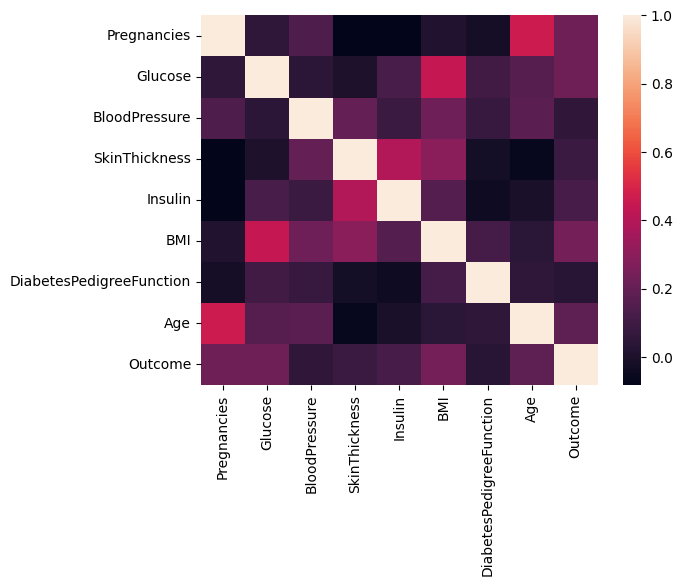

In [8]:
sns.heatmap(data.corr())

On a décidé de supprimer les features **DiabetesPedigreeFunction**, **BloodPressure** et **SkinThickness** car elles présentent une corrélation très faible avec la variable cible (`Outcome`). Cela permettra de simplifier le modèle tout en conservant les features les plus pertinentes pour la prédiction du diabète.

In [9]:
data = data.drop(['DiabetesPedigreeFunction', 'BloodPressure',
                  'SkinThickness'], axis=1)

In [10]:
data

,Pregnancies,Glucose,Insulin,BMI,Age,Outcome
0,6,148.000000,0.0,33.6,50,1
1,1,130.706223,0.0,26.6,31,0
2,8,183.000000,0.0,23.3,32,1
3,1,89.000000,94.0,28.1,21,0
4,0,137.000000,168.0,43.1,33,1
...,...,...,...,...,...,...
763,10,101.000000,180.0,32.9,63,0
764,2,122.000000,0.0,36.8,27,0
765,5,121.000000,112.0,26.2,30,0
766,1,126.000000,0.0,30.1,47,1


## 4. Séparation des données (Train/Test)

In [11]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                     random_state=42)

## 5. Construction et entraînement de l’arbre de décision

In [12]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

best_params = {}
best_accuracy = 0

resultats = []

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            model = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=42
            )
            
            scores = cross_val_score(model, X_train, y_train, cv=5)
            mean_accuracy = np.mean(scores)

            resultats.append({
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'accuracy': mean_accuracy
            })

            if mean_accuracy > best_accuracy:
                best_accuracy = mean_accuracy
                best_params = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }

## 6. Évaluation du modèle

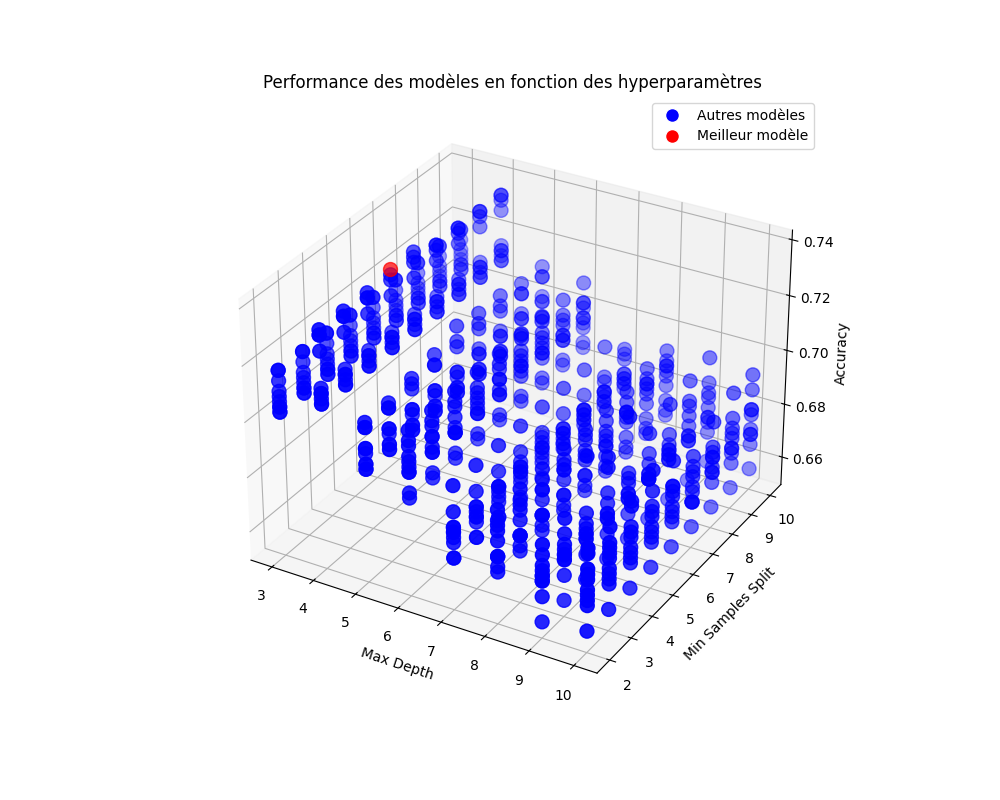

In [13]:
%matplotlib widget

max_depths = [r['max_depth'] for r in resultats]
min_samples_splits = [r['min_samples_split'] for r in resultats]
accuracies = [r['accuracy'] for r in resultats]

best_index = np.argmax(accuracies)

colors = ['blue'] * len(accuracies)  # Tous les points en bleu
colors[best_index] = 'red'  # Meilleure précision en rouge

# Créer le graphique en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(max_depths, min_samples_splits, accuracies, c=colors, s=100)

ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Accuracy')

legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Autres modèles',
           markerfacecolor='blue', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Meilleur modèle',
           markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right')

plt.title('Performance des modèles en fonction des hyperparamètres')
plt.show()

In [14]:
print(f"Meilleurs paramètres : {best_params}")
print(f"Meilleure précision : {best_accuracy:.4f}")

Meilleurs paramètres : {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 2}
Meilleure précision : 0.7374


## 7. Visualisation et interprétation de l'arbre de décision

### Exécution du Code Commenté pour l'Installation

Exécutez le code commenté ci-dessous pour installer les bibliothèques nécessaires.

In [15]:
# ! pip install graphviz pydotplus

In [16]:
# Meilleurs hyperparamètres trouvés
best_params = {
    'max_depth': 4,
    'min_samples_split': 5,
    'min_samples_leaf': 2
}

# Entraîner le modèle final avec les meilleurs hyperparamètres
best_model = DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

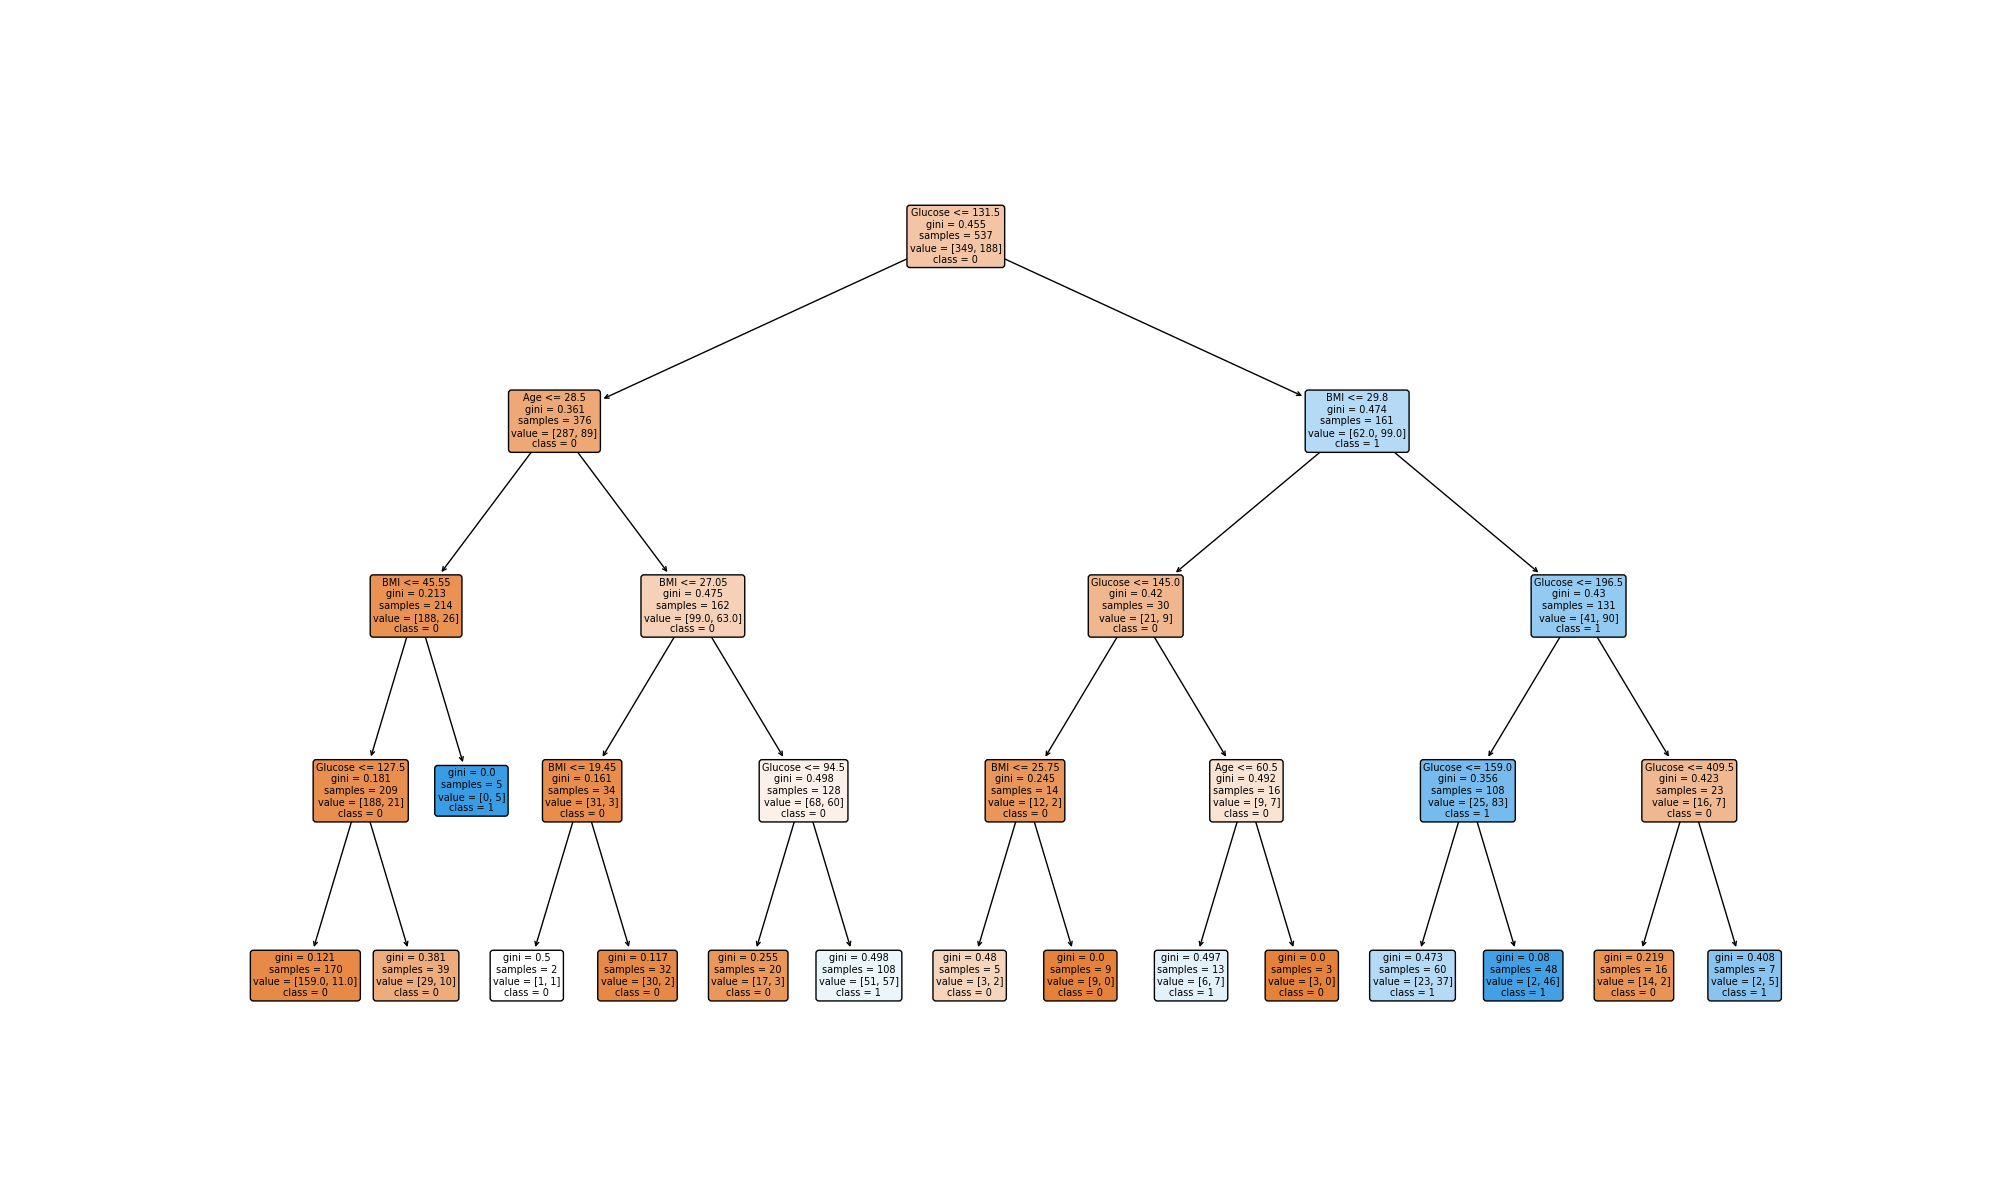

In [17]:
%matplotlib widget

plt.figure(figsize=(20, 12))  
plot_tree(best_model, feature_names=X_train.columns,
          class_names=[str(c) for c in best_model.classes_], filled=True, rounded=True)
plt.savefig("decision_tree.png", dpi=300)  # Sauvegarder l'image
plt.show()
